<a href="https://colab.research.google.com/github/karennik98/sin_net/blob/master/sin_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [27]:
import torch

**Train** **dataset**

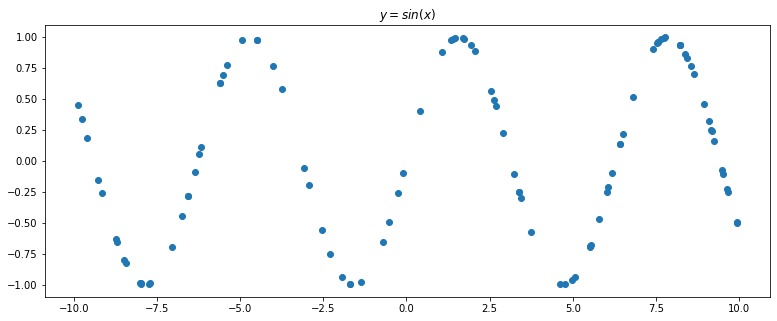

In [28]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

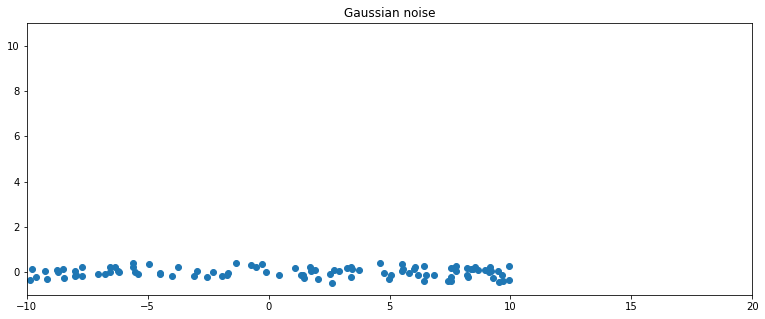

In [29]:
nois = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), nois.numpy(), 'o')
plt.axis([-10, 20, -1, 11])
plt.title('Gaussian noise');

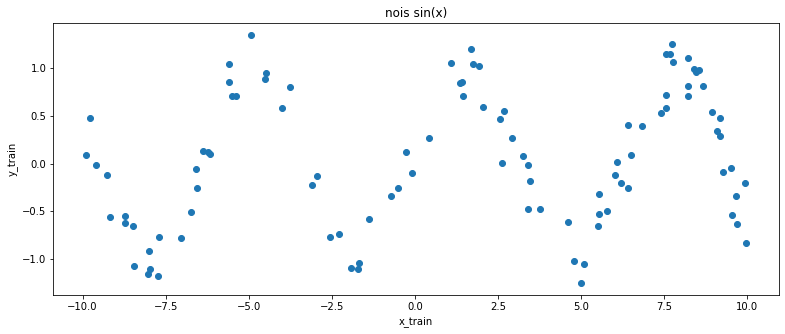

In [30]:
y_train = y_train + nois
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('nois sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [31]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [32]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


**Validation** **dataset**

Text(0, 0.5, 'y_validation')

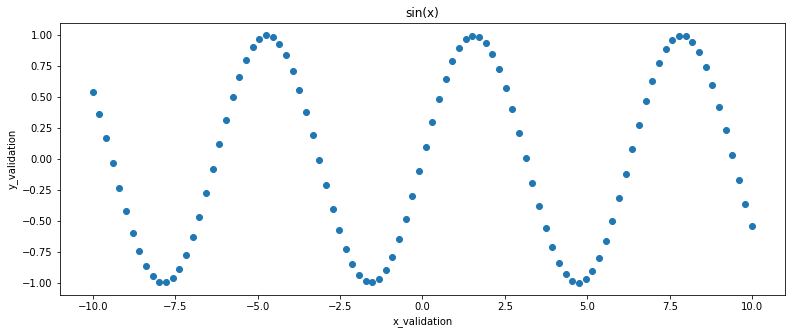

In [33]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [34]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

**Model** **construction**

In [35]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    # full conected layer, on torch that crated with torch.nn.Linear(input, output)
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, X):
    X = self.fc1(X)
    X = self.act1(X)
    X = self.fc2(X)
    return X
  
sine_net = SineNet(50)

**Prediction**

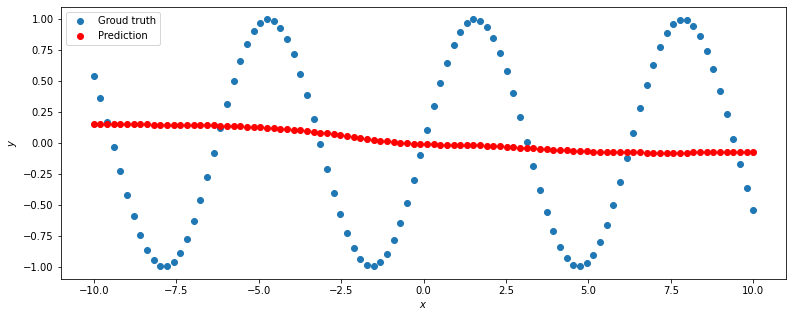

In [41]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', 
           c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

**Optimizer**

In [44]:
# first param is weights, senqond is learning rate
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

**Loss** **function**

In [45]:
#MSE mean sqaure error
def loss(pred, target):
    squares = (pred -target) ** 2
    return squares.mean()

**Training** **procedure**

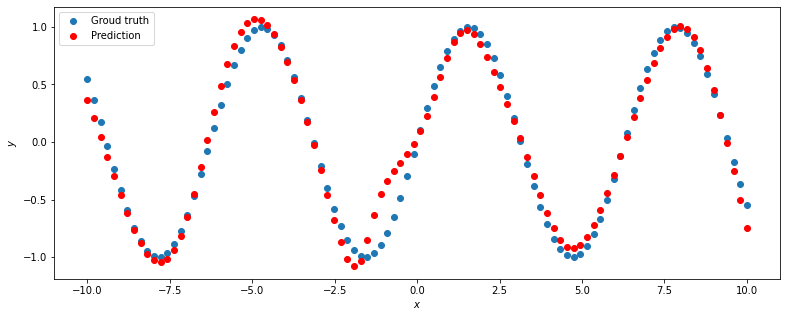

In [46]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)